In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

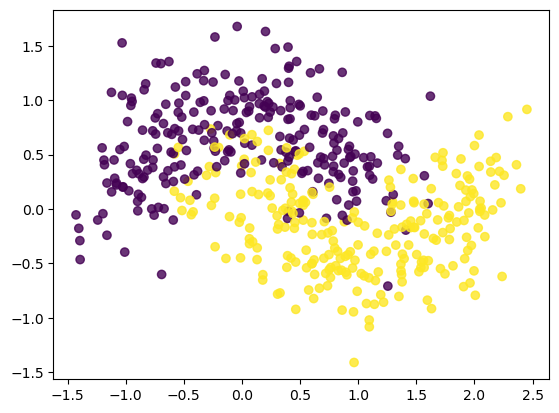

In [2]:
X,y=make_moons(n_samples=500,noise=0.3, random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

In [16]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [18]:
model_1=SGDClassifier(random_state=0)
model_2=DecisionTreeClassifier(random_state=0)
model_3=KNeighborsClassifier(n_neighbors=2)
model_4=VotingClassifier([('SGD',model_1),('Tree',model_2),('KNN',model_1)],voting='hard')
for model in(model_1,model_2,model_3,model_4):
    model.fit(X_train,y_train)
    print(model.__class__.__name__, model.score(X_test,y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
base_estimator = KNeighborsClassifier()
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=1000, random_state=0)
bagging_model.fit(X_train, y_train)
print("Bagging Classifier score:", bagging_model.score(X_test, y_test))


C:\Users\GHASSEN\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier score: 0.8866666666666667


In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)
score = random_forest_model.score(X_test, y_test)
print("Random Forest Classifier score:", score)


Random Forest Classifier score: 0.8933333333333333


In [30]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [31]:
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.88

In [39]:
from sklearn.ensemble import StackingClassifier


In [40]:
model=StackingClassifier([('SGD',model_1),('Tree',model_2),('KNN',model_3)],final_estimator=KNeighborsClassifier())
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8666666666666667